In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
bond = pd.read_csv("/jamesbond.csv")

In [5]:
# 1. ROI Analysis
bond['ROI'] = (bond['Box Office'] - bond['Budget']) / bond['Budget']
print("\nTop 5 Movies by ROI:")
print(bond[['Film', 'ROI']].sort_values(by='ROI', ascending=False).head())


Top 5 Movies by ROI:
                    Film        ROI
0                 Dr. No  63.114286
2             Goldfinger  43.107527
1  From Russia with Love  42.158730
3            Thunderball  19.241050
8       Live and Let Die  13.944805


In [6]:
# 2. Budget vs Box Office Correlation
correlation = bond['Budget'].corr(bond['Box Office'])
print(f"\nCorrelation between Budget and Box Office: {correlation:.2f}")


Correlation between Budget and Box Office: 0.28


In [7]:
# 3. Actor Performance
actor_performance = bond.groupby('Actor')[['Box Office', 'Budget']].sum()
actor_performance['Average ROI'] = bond.groupby('Actor')['ROI'].mean()
print("\nActor Performance Summary:")
print(actor_performance.sort_values(by='Box Office', ascending=False))


Actor Performance Summary:
                Box Office  Budget  Average ROI
Actor                                          
Sean Connery        3997.8   260.7    27.196667
Roger Moore         2960.7   363.7     8.159638
Daniel Craig        2765.9   703.2     2.975676
Pierce Brosnan      1886.6   523.3     2.999088
Timothy Dalton       564.4   125.5     3.490865
David Niven          315.0    85.0     2.705882
George Lazenby       291.5    37.3     6.815013


In [8]:
# 4. Director Performance
director_performance = bond.groupby('Director')[['Box Office', 'Budget']].sum()
director_performance['Average ROI'] = bond.groupby('Director')['ROI'].mean()
print("\nDirector Performance Summary:")
print(director_performance.sort_values(by='Box Office', ascending=False))


Director Performance Summary:
                    Box Office  Budget  Average ROI
Director                                           
Guy Hamilton            2057.2   111.8    19.965564
Terence Young           1840.7    61.5    41.504689
Sam Mendes              1670.2   376.5     3.533009
John Glen               1662.8   294.1     4.686291
Lewis Gilbert           1582.2   196.5     7.749828
Martin Campbell         1100.0   222.2     4.372294
Marc Forster             514.2   181.4     1.834620
Lee Tamahori             465.4   154.2     2.018158
Roger Spottiswoode       463.2   133.9     2.459298
Michael Apted            439.5   158.3     1.776374
Irvin Kershner           380.0    86.0     3.418605
Ken Hughes               315.0    85.0     2.705882
Peter R. Hunt            291.5    37.3     6.815013


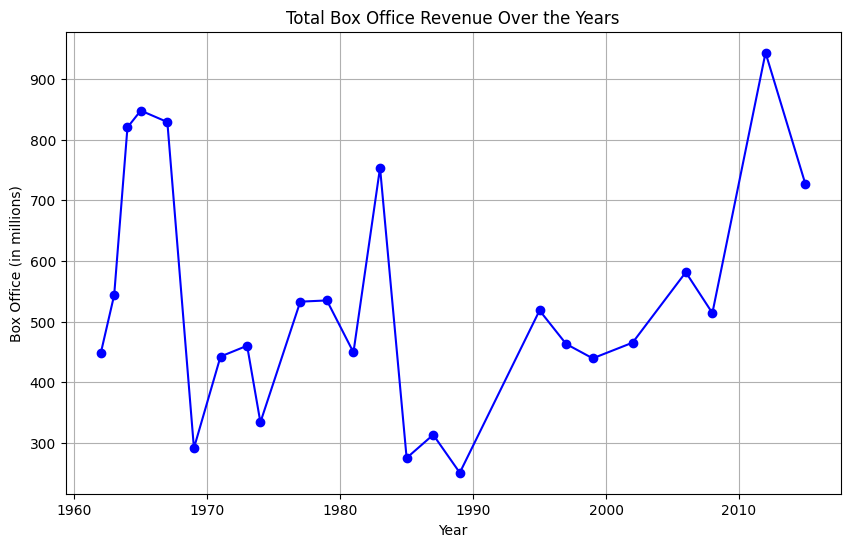

In [9]:
# 5. Box Office Trends Over the Years
yearly_box_office = bond.groupby('Year')['Box Office'].sum()
plt.figure(figsize=(10, 6))
plt.plot(yearly_box_office.index, yearly_box_office.values, marker='o', color='blue')
plt.title('Total Box Office Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Box Office (in millions)')
plt.grid(True)
plt.show()

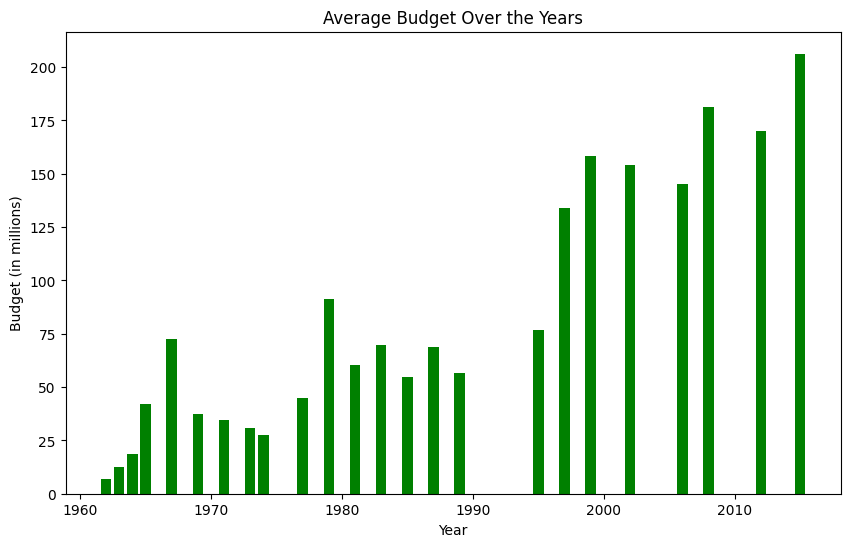

In [10]:
# 6. Budget Trends Over the Years
yearly_budget = bond.groupby('Year')['Budget'].mean()
plt.figure(figsize=(10, 6))
plt.bar(yearly_budget.index, yearly_budget.values, color='green')
plt.title('Average Budget Over the Years')
plt.xlabel('Year')
plt.ylabel('Budget (in millions)')
plt.show()

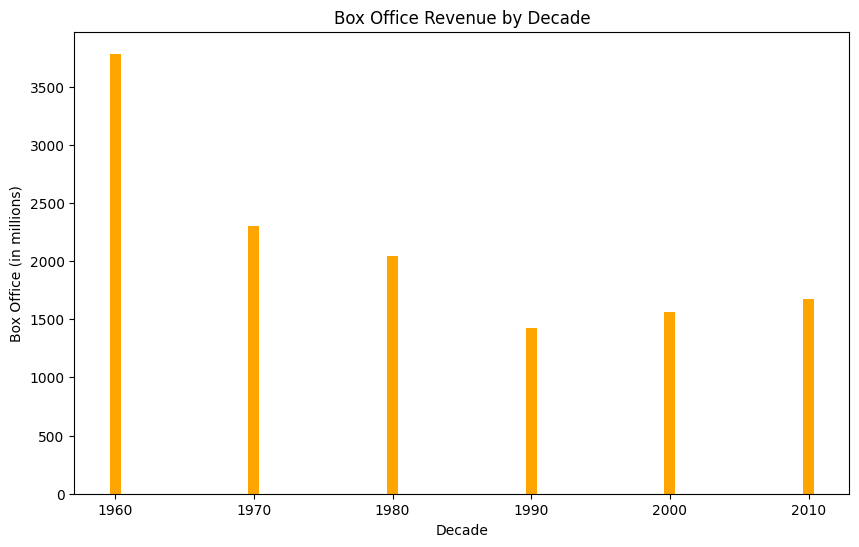

In [11]:
# 7. Box Office by Decade
bond['Decade'] = (bond['Year'] // 10) * 10
decade_performance = bond.groupby('Decade')['Box Office'].sum()
plt.figure(figsize=(10, 6))
plt.bar(decade_performance.index, decade_performance.values, color='orange')
plt.title('Box Office Revenue by Decade')
plt.xlabel('Decade')
plt.ylabel('Box Office (in millions)')
plt.show()

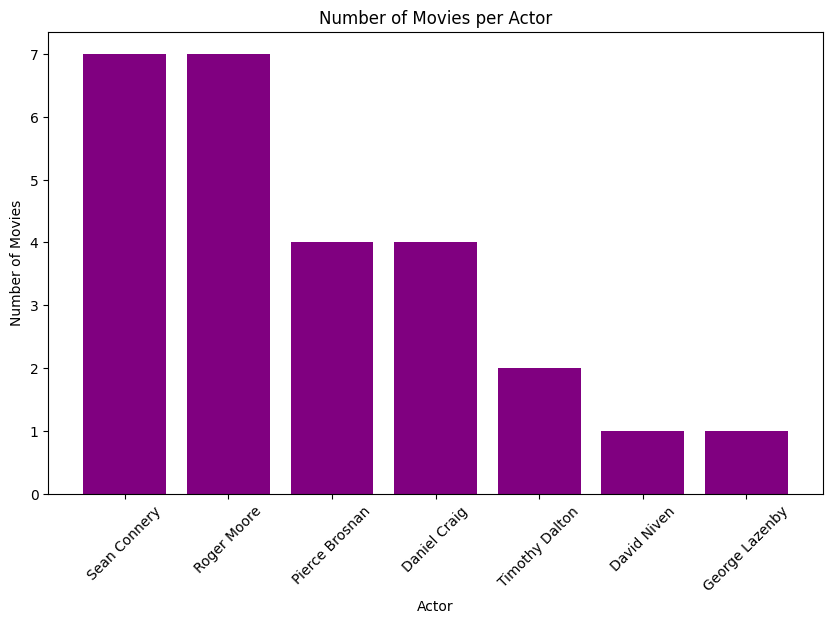

In [12]:
# 8. Actor Appearance Count
actor_appearance = bond['Actor'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(actor_appearance.index, actor_appearance.values, color='purple')
plt.title('Number of Movies per Actor')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [13]:
# 9. High Box Office Outliers
Q1 = bond['Box Office'].quantile(0.25)
Q3 = bond['Box Office'].quantile(0.75)
IQR = Q3 - Q1
outliers = bond[bond['Box Office'] > Q3 + 1.5 * IQR]
print("\nHigh Box Office Outliers:")
print(outliers[['Film', 'Box Office']])


High Box Office Outliers:
           Film  Box Office
2    Goldfinger       820.4
3   Thunderball       848.1
24      Skyfall       943.5


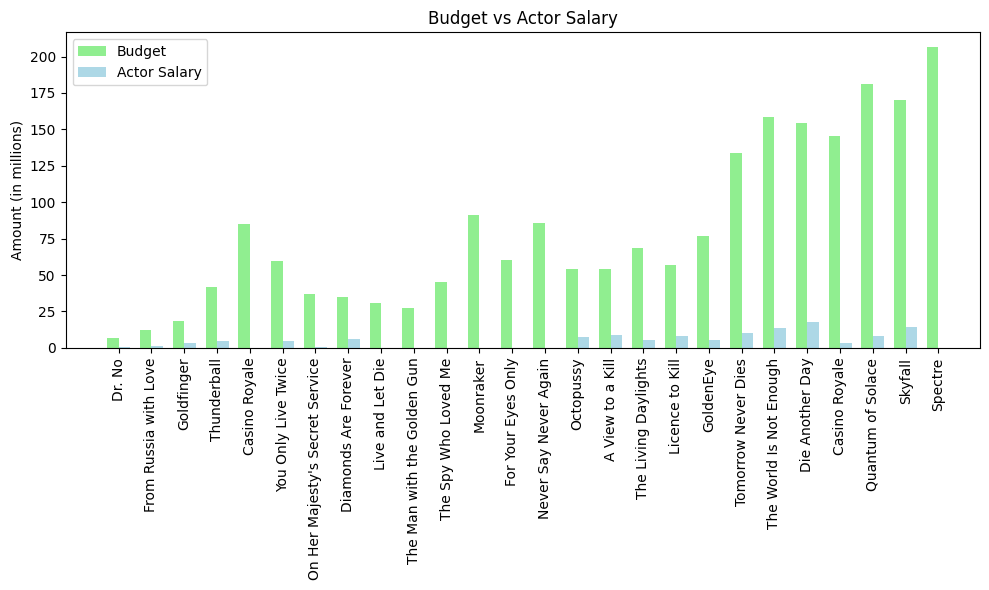

In [14]:
# 10. Budget vs Actor Salary Comparison
plt.figure(figsize=(10, 6))
ind = np.arange(len(bond))
width = 0.35
plt.bar(ind - width/2, bond['Budget'], width, label='Budget', color='lightgreen')
plt.bar(ind + width/2, bond['Bond Actor Salary'], width, label='Actor Salary', color='lightblue')
plt.xticks(ind, bond['Film'], rotation=90)
plt.title('Budget vs Actor Salary')
plt.ylabel('Amount (in millions)')
plt.legend()
plt.tight_layout()
plt.show()

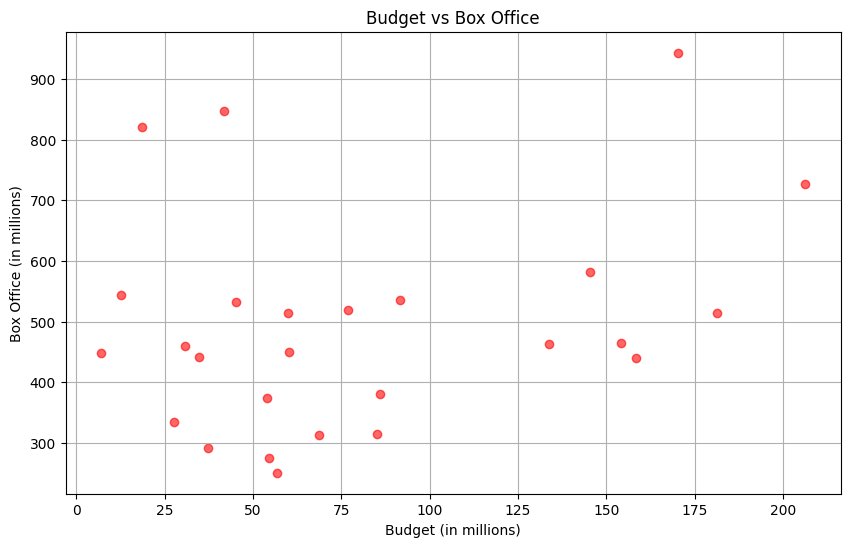

In [15]:
# 11. Scatter Plot: Budget vs Box Office
plt.figure(figsize=(10, 6))
plt.scatter(bond['Budget'], bond['Box Office'], color='red', alpha=0.6)
plt.title('Budget vs Box Office')
plt.xlabel('Budget (in millions)')
plt.ylabel('Box Office (in millions)')
plt.grid(True)
plt.show()

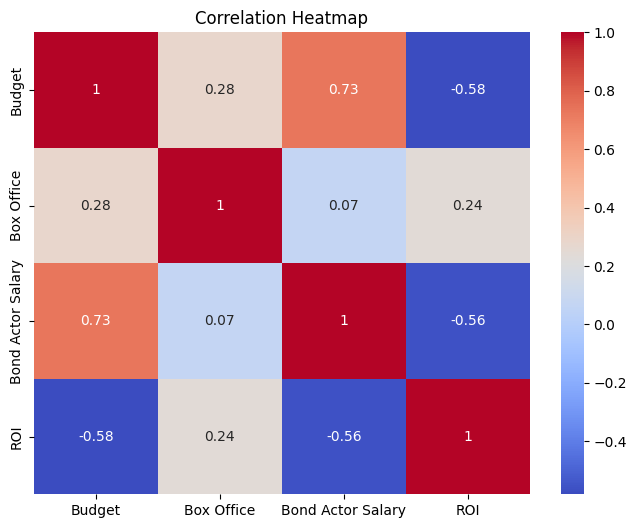

In [16]:
# 12. Heatmap of Correlation
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(bond[['Budget', 'Box Office', 'Bond Actor Salary', 'ROI']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

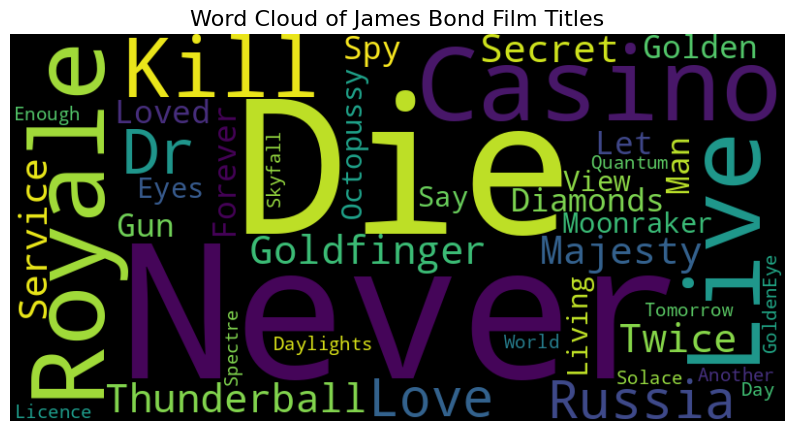

In [17]:
# to Generate Word Cloud for Film Titles
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all film titles into a single string
titles = " ".join(bond['Film'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axes
plt.title('Word Cloud of James Bond Film Titles', fontsize=16)
plt.show()


In [19]:
# Group the data by Director and Actor, and calculate the sum of the Box Office for each pair
director_actor_success = bond.groupby(['Director', 'Actor'])['Box Office'].sum().reset_index()

# Sort by Box Office in descending order to find the most successful Director-Actor pair
most_successful_pair = director_actor_success.sort_values('Box Office', ascending=False).head(1)
print("Most Successful Director-Actor Pair (Based on Box Office):")
print(most_successful_pair)


Most Successful Director-Actor Pair (Based on Box Office):
         Director         Actor  Box Office
16  Terence Young  Sean Connery      1840.7


In [20]:
# Assuming there's a column for critical reviews (e.g., "Critical Review Score")
if 'Critical Review Score' in bond.columns:
    # Scatter plot to compare Critical Review Score vs Box Office
    plt.figure(figsize=(8, 6))
    plt.scatter(bond['Critical Review Score'], bond['Box Office'], alpha=0.7, color='orange')
    plt.xlabel('Critical Review Score')  # Label for x-axis
    plt.ylabel('Box Office')  # Label for y-axis
    plt.title('Critical Review vs Box Office')  # Title
    plt.show()

    # Calculate the correlation between Critical Review Score and Box Office
    correlation = bond[['Critical Review Score', 'Box Office']].corr()
    print("Correlation between Critical Review and Box Office:")
    print(correlation)
else:
    print("No critical review data found.")

No critical review data found.


In [21]:
# Sort the data by year to ensure films are in chronological order
bond_sorted = bond.sort_values('Year')

# Calculate the difference in years between consecutive films
bond_sorted['Year Gap'] = bond_sorted['Year'].diff().shift(-1)  # Shift the difference down to align with next row

# Find the maximum gap
longest_gap = bond_sorted.loc[bond_sorted['Year Gap'].idxmax()]
print("Longest Gap Between Two Bond Films:")
print(longest_gap[['Film', 'Year', 'Year Gap']])

Longest Gap Between Two Bond Films:
Film        Licence to Kill
Year                   1989
Year Gap                6.0
Name: 17, dtype: object
